<a href="https://colab.research.google.com/github/RinadAkel/Image-Data-Augmentation/blob/main/Image_Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

© 2021 Zaka AI, Inc. All Rights Reserved

#Data Augmentation

**Objective:** The goal from this exercise is to learn how to use Keras' `ImageDataGenerator` class to augment a dataset through multiple processes such as horizontal flip, rotation and zoom.

## Preparing the data

###Github Repo

In [ ]:
# clone github repo
!git clone https://github.com/zaka-ai/computer-vision-course.git

Cloning into 'computer-vision-course'...
remote: Enumerating objects: 2118, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 2118 (delta 0), reused 0 (delta 0), pack-reused 2115
Receiving objects: 100% (2118/2118), 51.06 MiB | 33.87 MiB/s, done.
Resolving deltas: 100% (34/34), done.


### Importing modules

In [ ]:
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

### Loading the data

In [ ]:
# load the image
path = "computer-vision-course/deep_learning/data/baboon.jpg"
img = load_img(path)

# convert to numpy array
data = img_to_array(img)

print(data.shape)

# expand dimension to one sample
samples = expand_dims(data, 0)

print(samples.shape)

(512, 512, 3)
(1, 512, 512, 3)


Let's define a function that takes the training iteration as input and generates different images

In [ ]:
def show_examples(it):
  pyplot.figure(figsize=(15,10))
  # generate samples and plot
  for i in range(9):
	  # define subplot
	  pyplot.subplot(330 + 1 + i)
	
    # generate batch of images
	  batch = it.next()
	
    # convert to unsigned integers for viewing
	  image = batch[0].astype('uint32')
	
    # plot raw pixel data
	  pyplot.imshow(image)

  # show the figure
  pyplot.show()

## Horizontal and Vertical Shift Augmentation

Horizontal Shift: augment images by randomly shifting them on the x-axis through their width to create new images

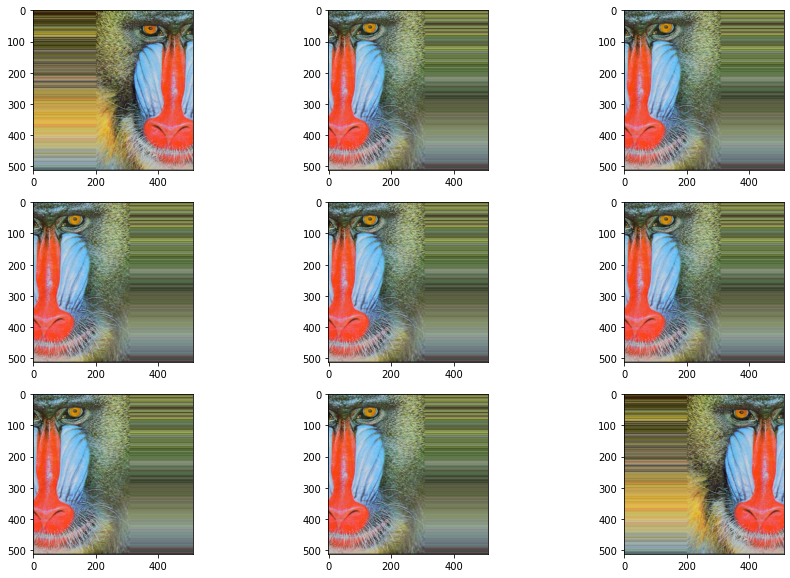

In [ ]:
# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-200,200])

# prepare iterator
it = datagen.flow(samples, batch_size=1)

# run and show examples
show_examples(it)

Vertical Shift: augment images by randomly shifting them on the y-axis through their height to create new images

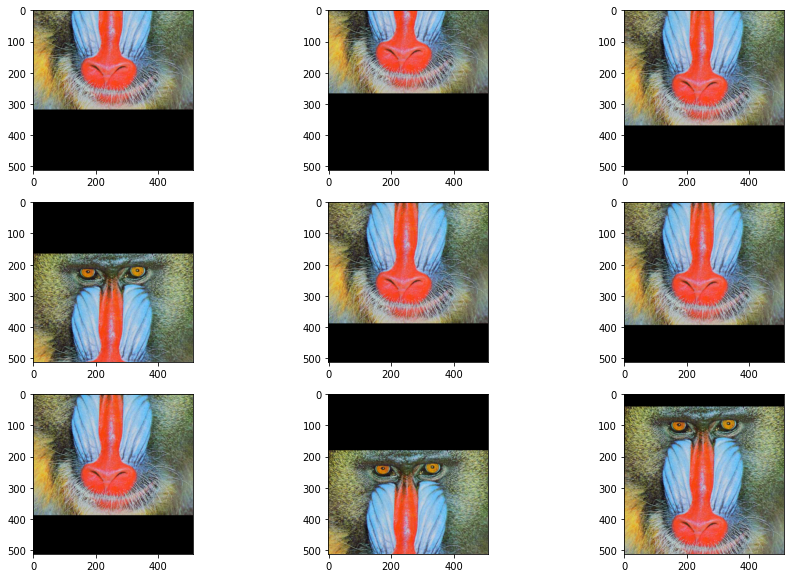

In [ ]:
# create image data augmentation generator
datagen = ImageDataGenerator(height_shift_range=0.5, fill_mode="constant")

# prepare iterator
it = datagen.flow(samples, batch_size=1)

# run and show examples
show_examples(it)

## Horizontal/Vertical flip augmentation
Flip images about their x-axis whenever `vertical_flip` is set to true to get more images that are flipped upside down

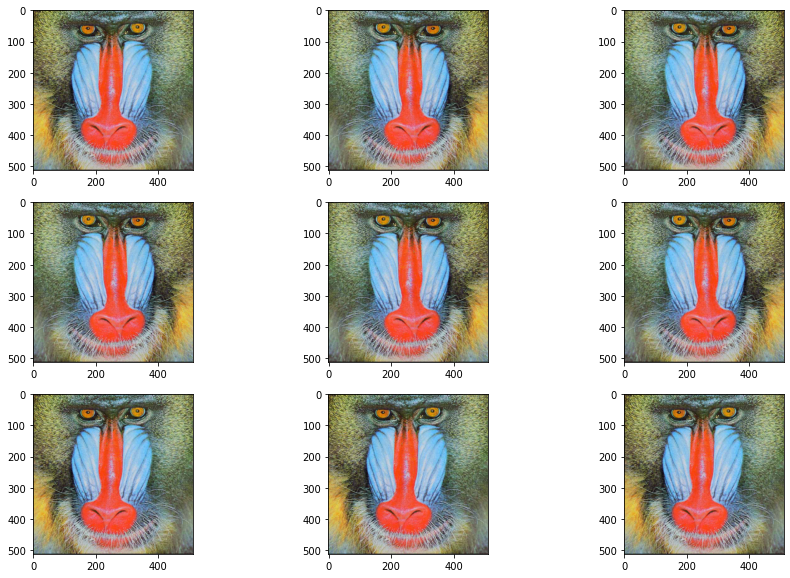

In [ ]:
# create image data augmentation generator
datagen = ImageDataGenerator(horizontal_flip=True)

# prepare iterator
it = datagen.flow(samples, batch_size=1)

# run and show examples
show_examples(it)

## Rotation augmentation
Rotate images about their center for augmentation

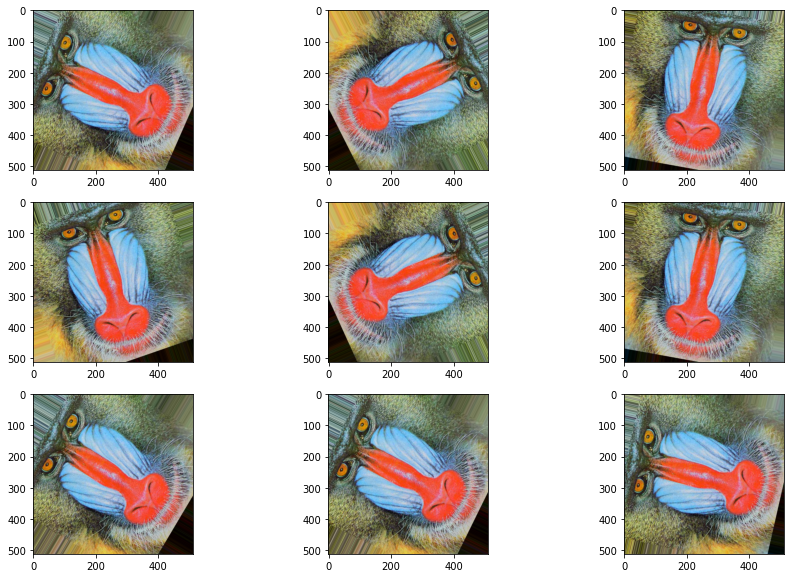

In [ ]:
# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=90)

# prepare iterator
it = datagen.flow(samples, batch_size=1)

# run and show examples
show_examples(it)

## Brightness Augmentation
Get more images through varying brightness of the base images

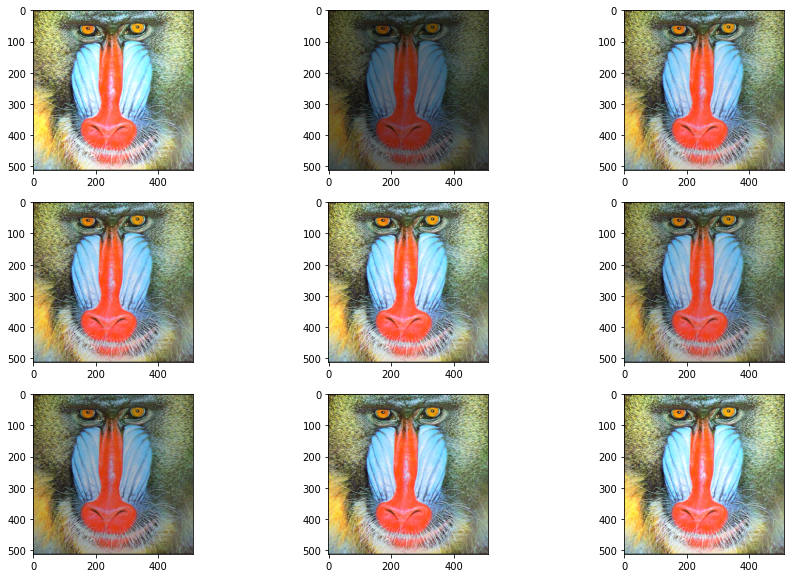

In [ ]:
# create image data augmentation generator
datagen = ImageDataGenerator(brightness_range=[0.2,1.5])

# prepare iterator
it = datagen.flow(samples, batch_size=1)

# run and show examples
show_examples(it)

## Zoom Augmentation
Zoom in on images to get augmented results for a dataset

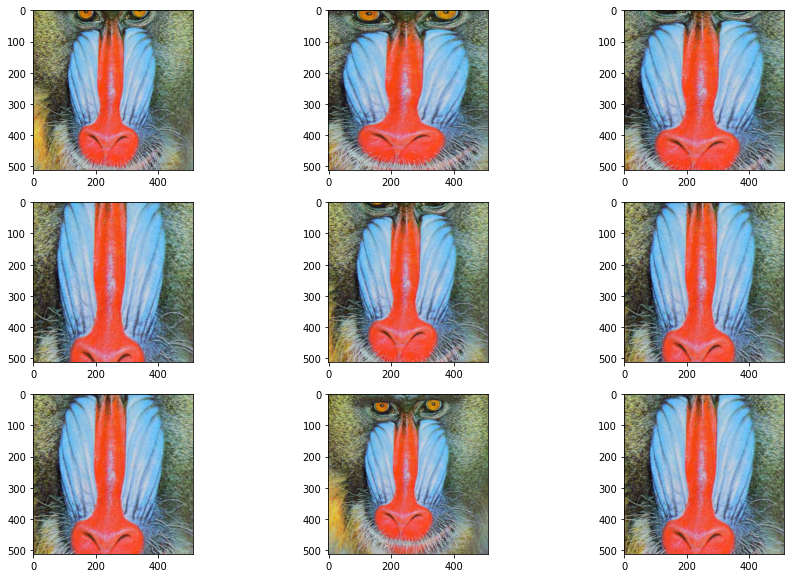

In [ ]:
# create image data augmentation generator
datagen = ImageDataGenerator(zoom_range=[0.5,1.0])

# prepare iterator
it = datagen.flow(samples, batch_size=1)

# run and show examples
show_examples(it)

# Task: Apply augmentation on the dataset

Found 20 images belonging to 2 classes.


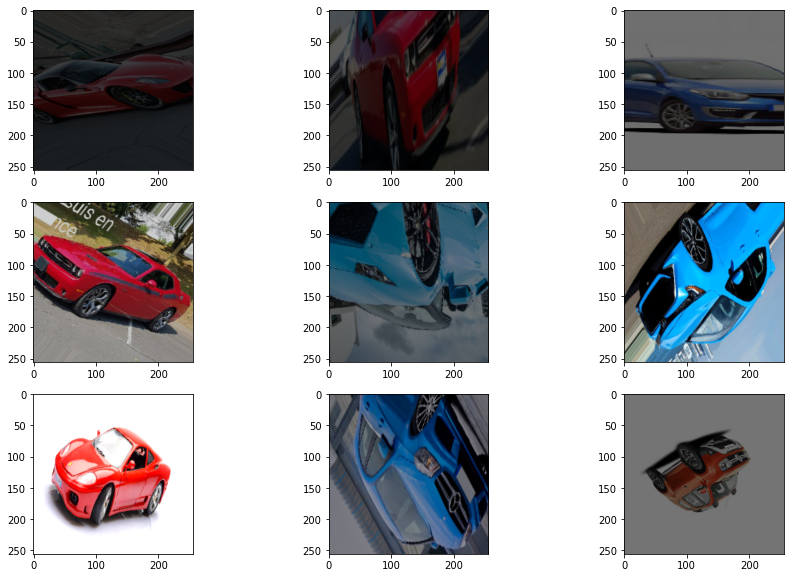

In [ ]:
# FILL BLANKS
datagen = ImageDataGenerator(vertical_flip=True, rotation_range=45, zoom_range=[0.3, 1.5], brightness_range=[0.2, 1.3])

train_it = datagen.flow_from_directory("computer-vision-course/deep_learning/dataset/train", class_mode="binary", batch_size=1)

pyplot.figure(figsize=(15,10))
# generate samples and plot
for i in range(9):
  # define subplot
  pyplot.subplot(330 + 1 + i)

  # generate batch of images
  batchX, batchY = train_it.next()

  # convert to unsigned integers for viewing
  image = batchX[0].astype('uint32')

  # plot raw pixel data
  pyplot.imshow(image)

# show the figure
pyplot.show()